# MNIST - Imbalanced binary classification problem
Train a CNN network to classify MNIST dataset into two classes, deciding
whether a digit in the image is greater (or equal to) or less than three (3), i.e. digit >= 2 or digit <2.
This is an imbalanced data classification problem.

 

## F-measre curve
I measure the performance in the F-measure space. This space allows us to visualize the global performance of the classifier over a range of decision thresholds, under different imbalance levels and the given preference between the classes.

\begin{align}
F_\alpha &= \frac{\mbox{TPR}/\alpha}{1/\alpha + \mbox{FPR}/P(+)+\mbox{TPR}-\mbox{FPR}-1} \\
\end{align}

For more information refer to the paper: "F-Measure Curves: A Tool to Visualize Classifier Performance Under Imbalance": https://www.sciencedirect.com/science/article/abs/pii/S0031320319304479

### Preprocessing on data:
- Downsample the original images to 14 x 14 pixels
- Blurring the images

The network architecture has 1-3 batch-normalized CNN layers (with 3x3xN kernels,
where N is an adjustable parameter) and 2x2 strides with zero padding followed by a single fully
connected layer.

### The training details
After importing the necessary packages and the dataset, I resized all images and blurred the images of training data.
After that I redefined the target vector by thresholding it. Then I defined the architecture of neural network in three settings. In the first setting shown as "model1" I used only one CNN layer, in the second setting shown as "model2", I used two CNN layers and in the third setting shown as "model3", I used three CNN layers.
For compiling the all three models, I used binary cross entropy loss that is suitable for binary classification. For the optimization algorithm, I used Adam optimizer that combines ideas from both momentum and RMSprop optimization methods (using weighted average of squared gradients, and adaptive learning rate.)
After complining the models, I reshaped the training and testing data for the keras model and trained the models over 20 epochs and saved the results.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization


Using TensorFlow backend.


In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Downsample the original images to 14 x 14 pixels and blurring the training images:

In [3]:
# from scipy import misc
new_shape = (14,14)
x_train = np.empty(shape=(X_train.shape[0],)+new_shape)
x_test = np.empty(shape=(X_test.shape[0],)+new_shape)
for idx in range(X_train.shape[0]):
    x_train[idx] = cv2.resize(cv2.blur(X_train[idx],(5,5)),(14,14))
for idx in range(X_test.shape[0]):
    x_test[idx] = cv2.resize(cv2.blur(X_test[idx],(5,5)),(14,14))
    


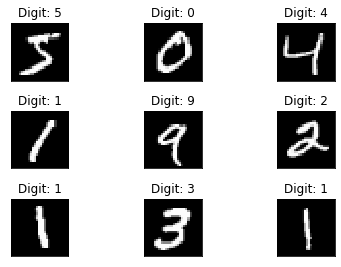

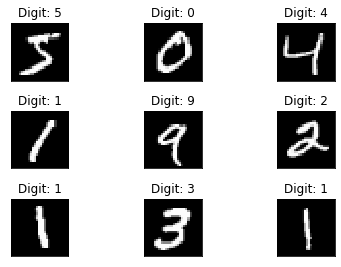

In [4]:
#original images

fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(Y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

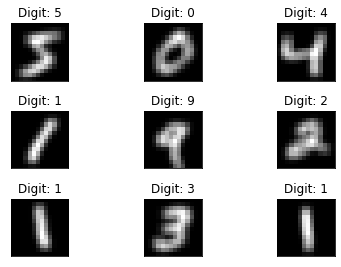

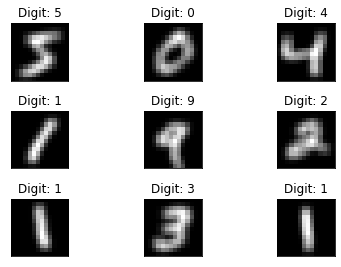

In [5]:
#blurred images

fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(Y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [6]:
y_train = Y_train >= 2
y_train.astype(np.int)
y_test = Y_test >= 2
y_test.astype(np.int)

array([1, 1, 0, ..., 1, 1, 1])

In [7]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3),strides=(2, 2), padding='same', activation='relu', input_shape=(14, 14,1)))
model1.add(BatchNormalization())
model1.add(Flatten())
model1.add(Dense(10, activation='relu'))
model1.add(Dense(1))
model1.add(Activation('sigmoid'))

In [8]:
model1.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [9]:
train_X = x_train.reshape(x_train.shape[0],14, 14,1).astype('float32')
test_X = x_test.reshape(x_test.shape[0],14, 14,1).astype('float32')

In [10]:
# training the model and saving metrics in history
history1 = model1.fit(train_X, y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(test_X, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 4s - loss: 0.0470 - accuracy: 0.9837 - val_loss: 0.0203 - val_accuracy: 0.9933
Epoch 2/20
 - 3s - loss: 0.0229 - accuracy: 0.9928 - val_loss: 0.0243 - val_accuracy: 0.9913
Epoch 3/20
 - 3s - loss: 0.0179 - accuracy: 0.9939 - val_loss: 0.0185 - val_accuracy: 0.9945
Epoch 4/20
 - 3s - loss: 0.0161 - accuracy: 0.9946 - val_loss: 0.0162 - val_accuracy: 0.9953
Epoch 5/20
 - 3s - loss: 0.0138 - accuracy: 0.9954 - val_loss: 0.0163 - val_accuracy: 0.9951
Epoch 6/20
 - 3s - loss: 0.0140 - accuracy: 0.9948 - val_loss: 0.0179 - val_accuracy: 0.9946
Epoch 7/20
 - 3s - loss: 0.0107 - accuracy: 0.9963 - val_loss: 0.0188 - val_accuracy: 0.9948
Epoch 8/20
 - 3s - loss: 0.0110 - accuracy: 0.9962 - val_loss: 0.0170 - val_accuracy: 0.9948
Epoch 9/20
 - 3s - loss: 0.0099 - accuracy: 0.9965 - val_loss: 0.0129 - val_accuracy: 0.9964
Epoch 10/20
 - 3s - loss: 0.0081 - accuracy: 0.9971 - val_loss: 0.0177 - val_accuracy: 0.9954
Epoch 11/20
 - 3s -

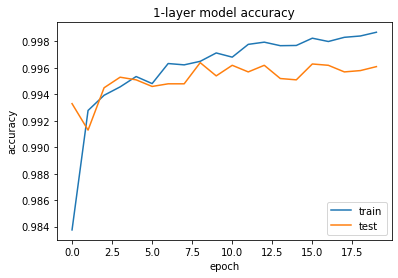

In [11]:
fig = plt.figure()
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('1-layer model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')



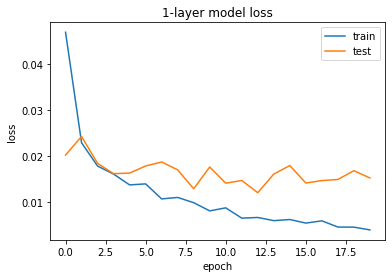

In [12]:

fig = plt.figure()
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('1-layer model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')




In [13]:
loss_and_metrics1 = model1.evaluate(test_X, y_test, verbose=2)

print("Test Loss", loss_and_metrics1[0])
print("Test Accuracy", loss_and_metrics1[1])

Test Loss 0.015277914022905225
Test Accuracy 0.9961000084877014


## The F-measure curve

In [23]:
probs = model1.predict(test_X)

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [60]:
def F_alpha_measure(probs,y_test, alpha):
    fpr, tpr, _ = roc_curve(y_test, probs)
    f = []
    for p in range(1,100):
        f.append((tpr/alpha)/((1/alpha) + (fpr/(p/100)) + tpr - fpr -1))
    f = np.matrix(f)
    return f.max(axis=1)

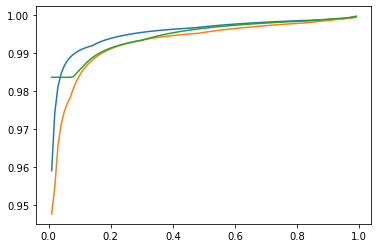

In [65]:
import matplotlib.pyplot as plt
plt.plot(np.array(range(1,100))/100,F_alpha_measure(probs,y_test, 0.15))
plt.plot(np.array(range(1,100))/100,F_alpha_measure(probs,y_test, 0.5))
plt.plot(np.array(range(1,100))/100,F_alpha_measure(probs,y_test, 0.85))
